### Import Library

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
import scipy.stats as scs

### Data Collection

In [3]:
path = '../data/raw/smoke_detection_iot.csv'
ori = pd.read_csv(path, index_col=0)
ori

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [4]:
joblib.dump(ori, '../data/processed/ori.pkl')

['../data/processed/ori.pkl']

### Data Definition

UTC :  
&nbsp;&nbsp;&nbsp;&nbsp;[integer]  
&nbsp;&nbsp;&nbsp;&nbsp;waktu pengambilan sample dalam detik UTC  
&nbsp;&nbsp;&nbsp;&nbsp;SECONDS SINCE JAN 01 1970  

Temperature[C]  :  
&nbsp;&nbsp;&nbsp;&nbsp;[float]  
&nbsp;&nbsp;&nbsp;&nbsp;suhu dalam derajat celcius  

Humidity[%] :  
&nbsp;&nbsp;&nbsp;&nbsp;[float]  
&nbsp;&nbsp;&nbsp;&nbsp;kelembaban udara  

TVOC[ppb]    :  
&nbsp;&nbsp;&nbsp;&nbsp;[integer]  
&nbsp;&nbsp;&nbsp;&nbsp;Total Volatile Organic Compounds  

eCO2[ppm]   :  
&nbsp;&nbsp;&nbsp;&nbsp;[integer]  
&nbsp;&nbsp;&nbsp;&nbsp;CO2 equivalent concentration  

Raw H2  :  
&nbsp;&nbsp;&nbsp;&nbsp;[integer]  
&nbsp;&nbsp;&nbsp;&nbsp;raw molecular hydrogen  

Raw Ethanol :  
&nbsp;&nbsp;&nbsp;&nbsp;[integer]  
&nbsp;&nbsp;&nbsp;&nbsp;raw ethanol gas  

Pressure[hPa]   :  
&nbsp;&nbsp;&nbsp;&nbsp;[float]  
&nbsp;&nbsp;&nbsp;&nbsp;Tekanan udara  

PM1.0, PM2.5   :  
&nbsp;&nbsp;&nbsp;&nbsp;[float]  
&nbsp;&nbsp;&nbsp;&nbsp;ukuran partikel dalam micron

NC0.5, NC1.0, NC2.5  :  
&nbsp;&nbsp;&nbsp;&nbsp;[float]  
&nbsp;&nbsp;&nbsp;&nbsp;Number concentration of particulate (micron)  

CNT :  
&nbsp;&nbsp;&nbsp;&nbsp;[integer]  
&nbsp;&nbsp;&nbsp;&nbsp;Sample counter  

Fire Alarm  :  
&nbsp;&nbsp;&nbsp;&nbsp;[integer]  
&nbsp;&nbsp;&nbsp;&nbsp;Fire Alarm, 1=fire, 0=not

In [5]:
ori.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.6 MB


### Data Validation

#### Tipe Data

In [6]:
ori.dtypes

UTC                 int64
Temperature[C]    float64
Humidity[%]       float64
TVOC[ppb]           int64
eCO2[ppm]           int64
Raw H2              int64
Raw Ethanol         int64
Pressure[hPa]     float64
PM1.0             float64
PM2.5             float64
NC0.5             float64
NC1.0             float64
NC2.5             float64
CNT                 int64
Fire Alarm          int64
dtype: object

#### Range

In [7]:
ori.describe().T

,count,mean,std,min,25%,50%,75%,max
UTC,62630.0,1.654792e+09,110002.488078,1.654712e+09,1.654743e+09,1.654762e+09,1.654778e+09,1.655130e+09
Temperature[C],62630.0,1.597042e+01,14.359576,-2.201000e+01,1.099425e+01,2.013000e+01,2.540950e+01,5.993000e+01
Humidity[%],62630.0,4.853950e+01,8.865367,1.074000e+01,4.753000e+01,5.015000e+01,5.324000e+01,7.520000e+01
TVOC[ppb],62630.0,1.942058e+03,7811.589055,0.000000e+00,1.300000e+02,9.810000e+02,1.189000e+03,6.000000e+04
eCO2[ppm],62630.0,6.700210e+02,1905.885439,4.000000e+02,4.000000e+02,4.000000e+02,4.380000e+02,6.000000e+04
Raw H2,62630.0,1.294245e+04,272.464305,1.066800e+04,1.283000e+04,1.292400e+04,1.310900e+04,1.380300e+04
Raw Ethanol,62630.0,1.975426e+04,609.513156,1.531700e+04,1.943500e+04,1.950100e+04,2.007800e+04,2.141000e+04
Pressure[hPa],62630.0,9.386276e+02,1.331344,9.308520e+02,9.387000e+02,9.388160e+02,9.394180e+02,9.398610e+02
PM1.0,62630.0,1.005943e+02,922.524245,0.000000e+00,1.280000e+00,1.810000e+00,2.090000e+00,1.433369e+04
PM2.5,62630.0,1.844678e+02,1976.305615,0.000000e+00,1.340000e+00,1.880000e+00,2.180000e+00,4.543226e+04


#### Dimensi Data

In [8]:
ori.shape

(62630, 15)

### Handling Columns Error

In [9]:
# dari tipe data, terlihat bahwa semua data sdh sesuai dg tipe nya, sehingga bagian ini tidak diperlukan

### Data Splitting

In [10]:
target = 'Fire Alarm'
x = ori.drop(target, axis=1).copy()
y = ori[target].copy()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42, stratify = y_test)

In [21]:
joblib.dump(x_train, '../data/processed/x_train.pkl')
joblib.dump(y_train, '../data/processed/y_train.pkl')
joblib.dump(x_valid, '../data/processed/x_valid.pkl')
joblib.dump(y_valid, '../data/processed/y_valid.pkl')
joblib.dump(x_test, '../data/processed/x_test.pkl')
joblib.dump(y_test, '../data/processed/y_test.pkl')

['../data/processed/y_test.pkl']

### Check Missing Value

In [26]:
dataset = pd.concat([x_train, y_train], axis = 1)
dataset.isnull().sum().sort_values(ascending=True)

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

### Check informasi statistik

In [27]:
# cek skewness
dataset.skew(numeric_only = True)

UTC                2.556496
Temperature[C]    -0.639439
Humidity[%]       -2.471426
TVOC[ppb]          6.849945
eCO2[ppm]         12.857960
Raw H2            -2.924601
Raw Ethanol       -1.689788
Pressure[hPa]     -3.614590
PM1.0             10.666056
PM2.5             13.940567
NC0.5              9.991239
NC1.0             14.231518
NC2.5             17.431975
CNT                0.324857
Fire Alarm        -0.950572
dtype: float64

In [28]:
# pisahkan menjadi 2 kelas untuk melihat apakah kita perlu melakukan imputasi berdasarkan kelas
dataset_fire = dataset[dataset['Fire Alarm'] == 1].copy()
dataset_no_fire = dataset[dataset['Fire Alarm'] != 0].copy()

In [31]:
dataset_fire.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,3.133000e+04,31330.000000,31330.000000,31330.000000,31330.000000,31330.000000,31330.000000,31330.000000,31330.000000,31330.000000,31330.000000,31330.000000,31330.000000,31330.000000,31330.0
mean,1.654765e+09,14.487854,50.803776,881.429684,555.352538,12960.305394,19622.486945,938.838556,38.809410,84.758161,155.460893,94.797510,44.075012,13746.296234,1.0
std,2.702810e+04,13.837322,5.912339,536.266239,1313.528576,167.678943,305.683640,1.306479,619.322189,1558.595077,2252.899637,1762.121757,930.017434,6566.291662,0.0
min,1.654712e+09,-22.010000,13.360000,0.000000,400.000000,10939.000000,17809.000000,930.852000,0.150000,0.160000,1.060000,0.165000,0.004000,3.000000,1.0
25%,1.654748e+09,5.120250,48.410000,332.000000,400.000000,12861.000000,19427.000000,938.731000,1.590000,1.650000,10.920000,1.702000,0.038000,8210.000000,1.0
50%,1.654765e+09,20.050000,51.440000,1103.000000,404.000000,12932.000000,19454.000000,938.878000,1.870000,1.940000,12.850000,2.003000,0.045000,13789.500000,1.0
75%,1.654776e+09,24.750000,53.490000,1207.000000,481.000000,13084.750000,19918.000000,939.289000,2.140000,2.230000,14.740000,2.299000,0.052000,19387.000000,1.0
max,1.655124e+09,41.410000,70.190000,18031.000000,60000.000000,13634.000000,21109.000000,939.771000,14318.170000,45432.260000,60442.710000,51914.680000,30026.438000,24993.000000,1.0


In [32]:
dataset_no_fire.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,3.133000e+04,31330.000000,31330.000000,31330.000000,31330.000000,31330.000000,31330.000000,31330.000000,31330.000000,31330.000000,31330.000000,31330.000000,31330.000000,31330.000000,31330.0
mean,1.654765e+09,14.487854,50.803776,881.429684,555.352538,12960.305394,19622.486945,938.838556,38.809410,84.758161,155.460893,94.797510,44.075012,13746.296234,1.0
std,2.702810e+04,13.837322,5.912339,536.266239,1313.528576,167.678943,305.683640,1.306479,619.322189,1558.595077,2252.899637,1762.121757,930.017434,6566.291662,0.0
min,1.654712e+09,-22.010000,13.360000,0.000000,400.000000,10939.000000,17809.000000,930.852000,0.150000,0.160000,1.060000,0.165000,0.004000,3.000000,1.0
25%,1.654748e+09,5.120250,48.410000,332.000000,400.000000,12861.000000,19427.000000,938.731000,1.590000,1.650000,10.920000,1.702000,0.038000,8210.000000,1.0
50%,1.654765e+09,20.050000,51.440000,1103.000000,404.000000,12932.000000,19454.000000,938.878000,1.870000,1.940000,12.850000,2.003000,0.045000,13789.500000,1.0
75%,1.654776e+09,24.750000,53.490000,1207.000000,481.000000,13084.750000,19918.000000,939.289000,2.140000,2.230000,14.740000,2.299000,0.052000,19387.000000,1.0
max,1.655124e+09,41.410000,70.190000,18031.000000,60000.000000,13634.000000,21109.000000,939.771000,14318.170000,45432.260000,60442.710000,51914.680000,30026.438000,24993.000000,1.0


## Univariate Analysis

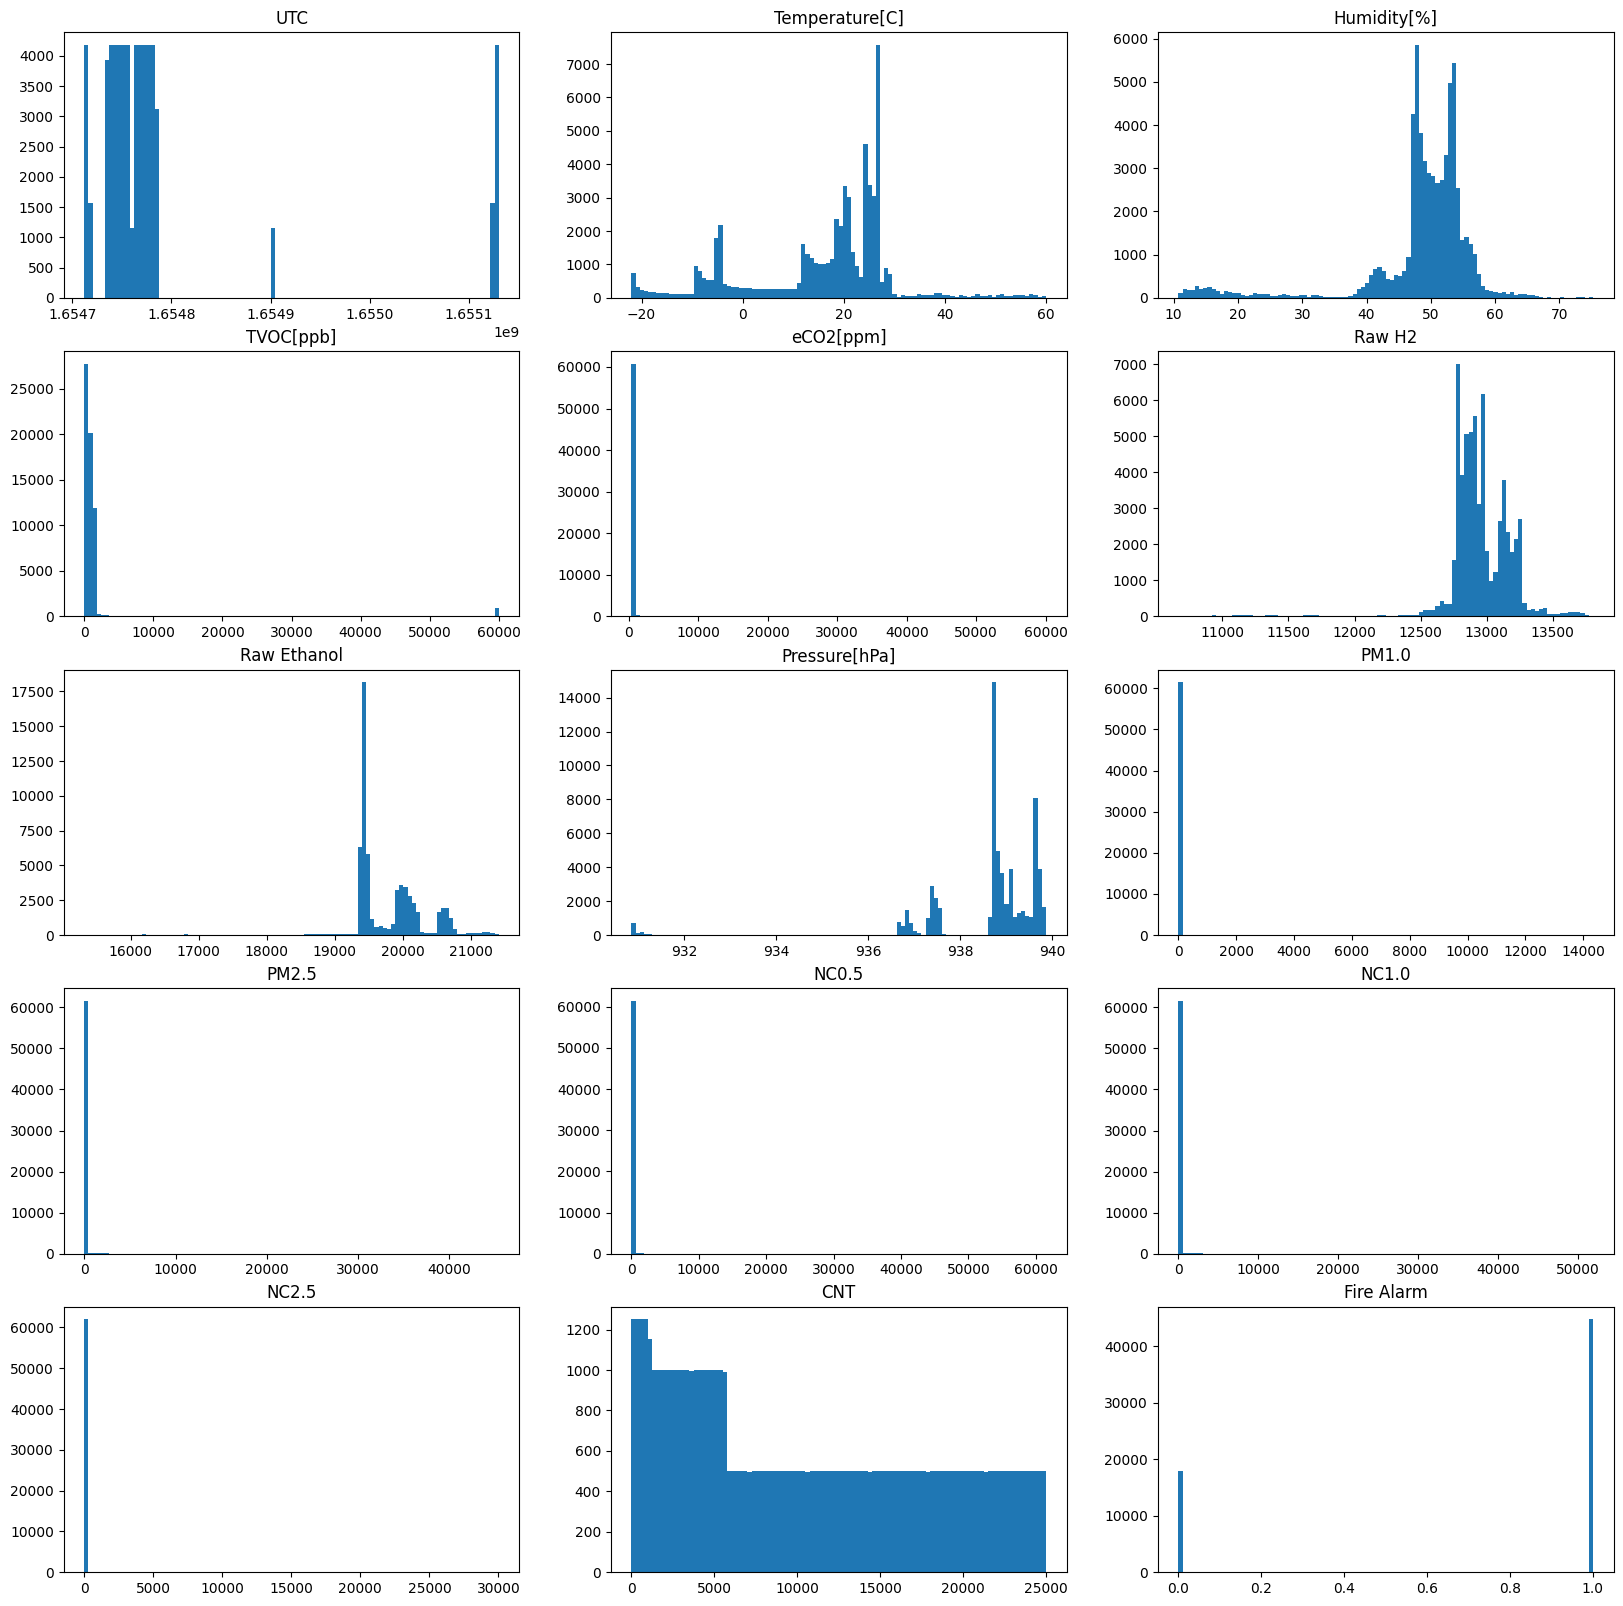

In [13]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20,20))
for j,i in enumerate(ori.columns):
    ax[j//3, j%3].hist(ori[i], bins=100)
    ax[j//3, j%3].set_title(i)
plt.show()

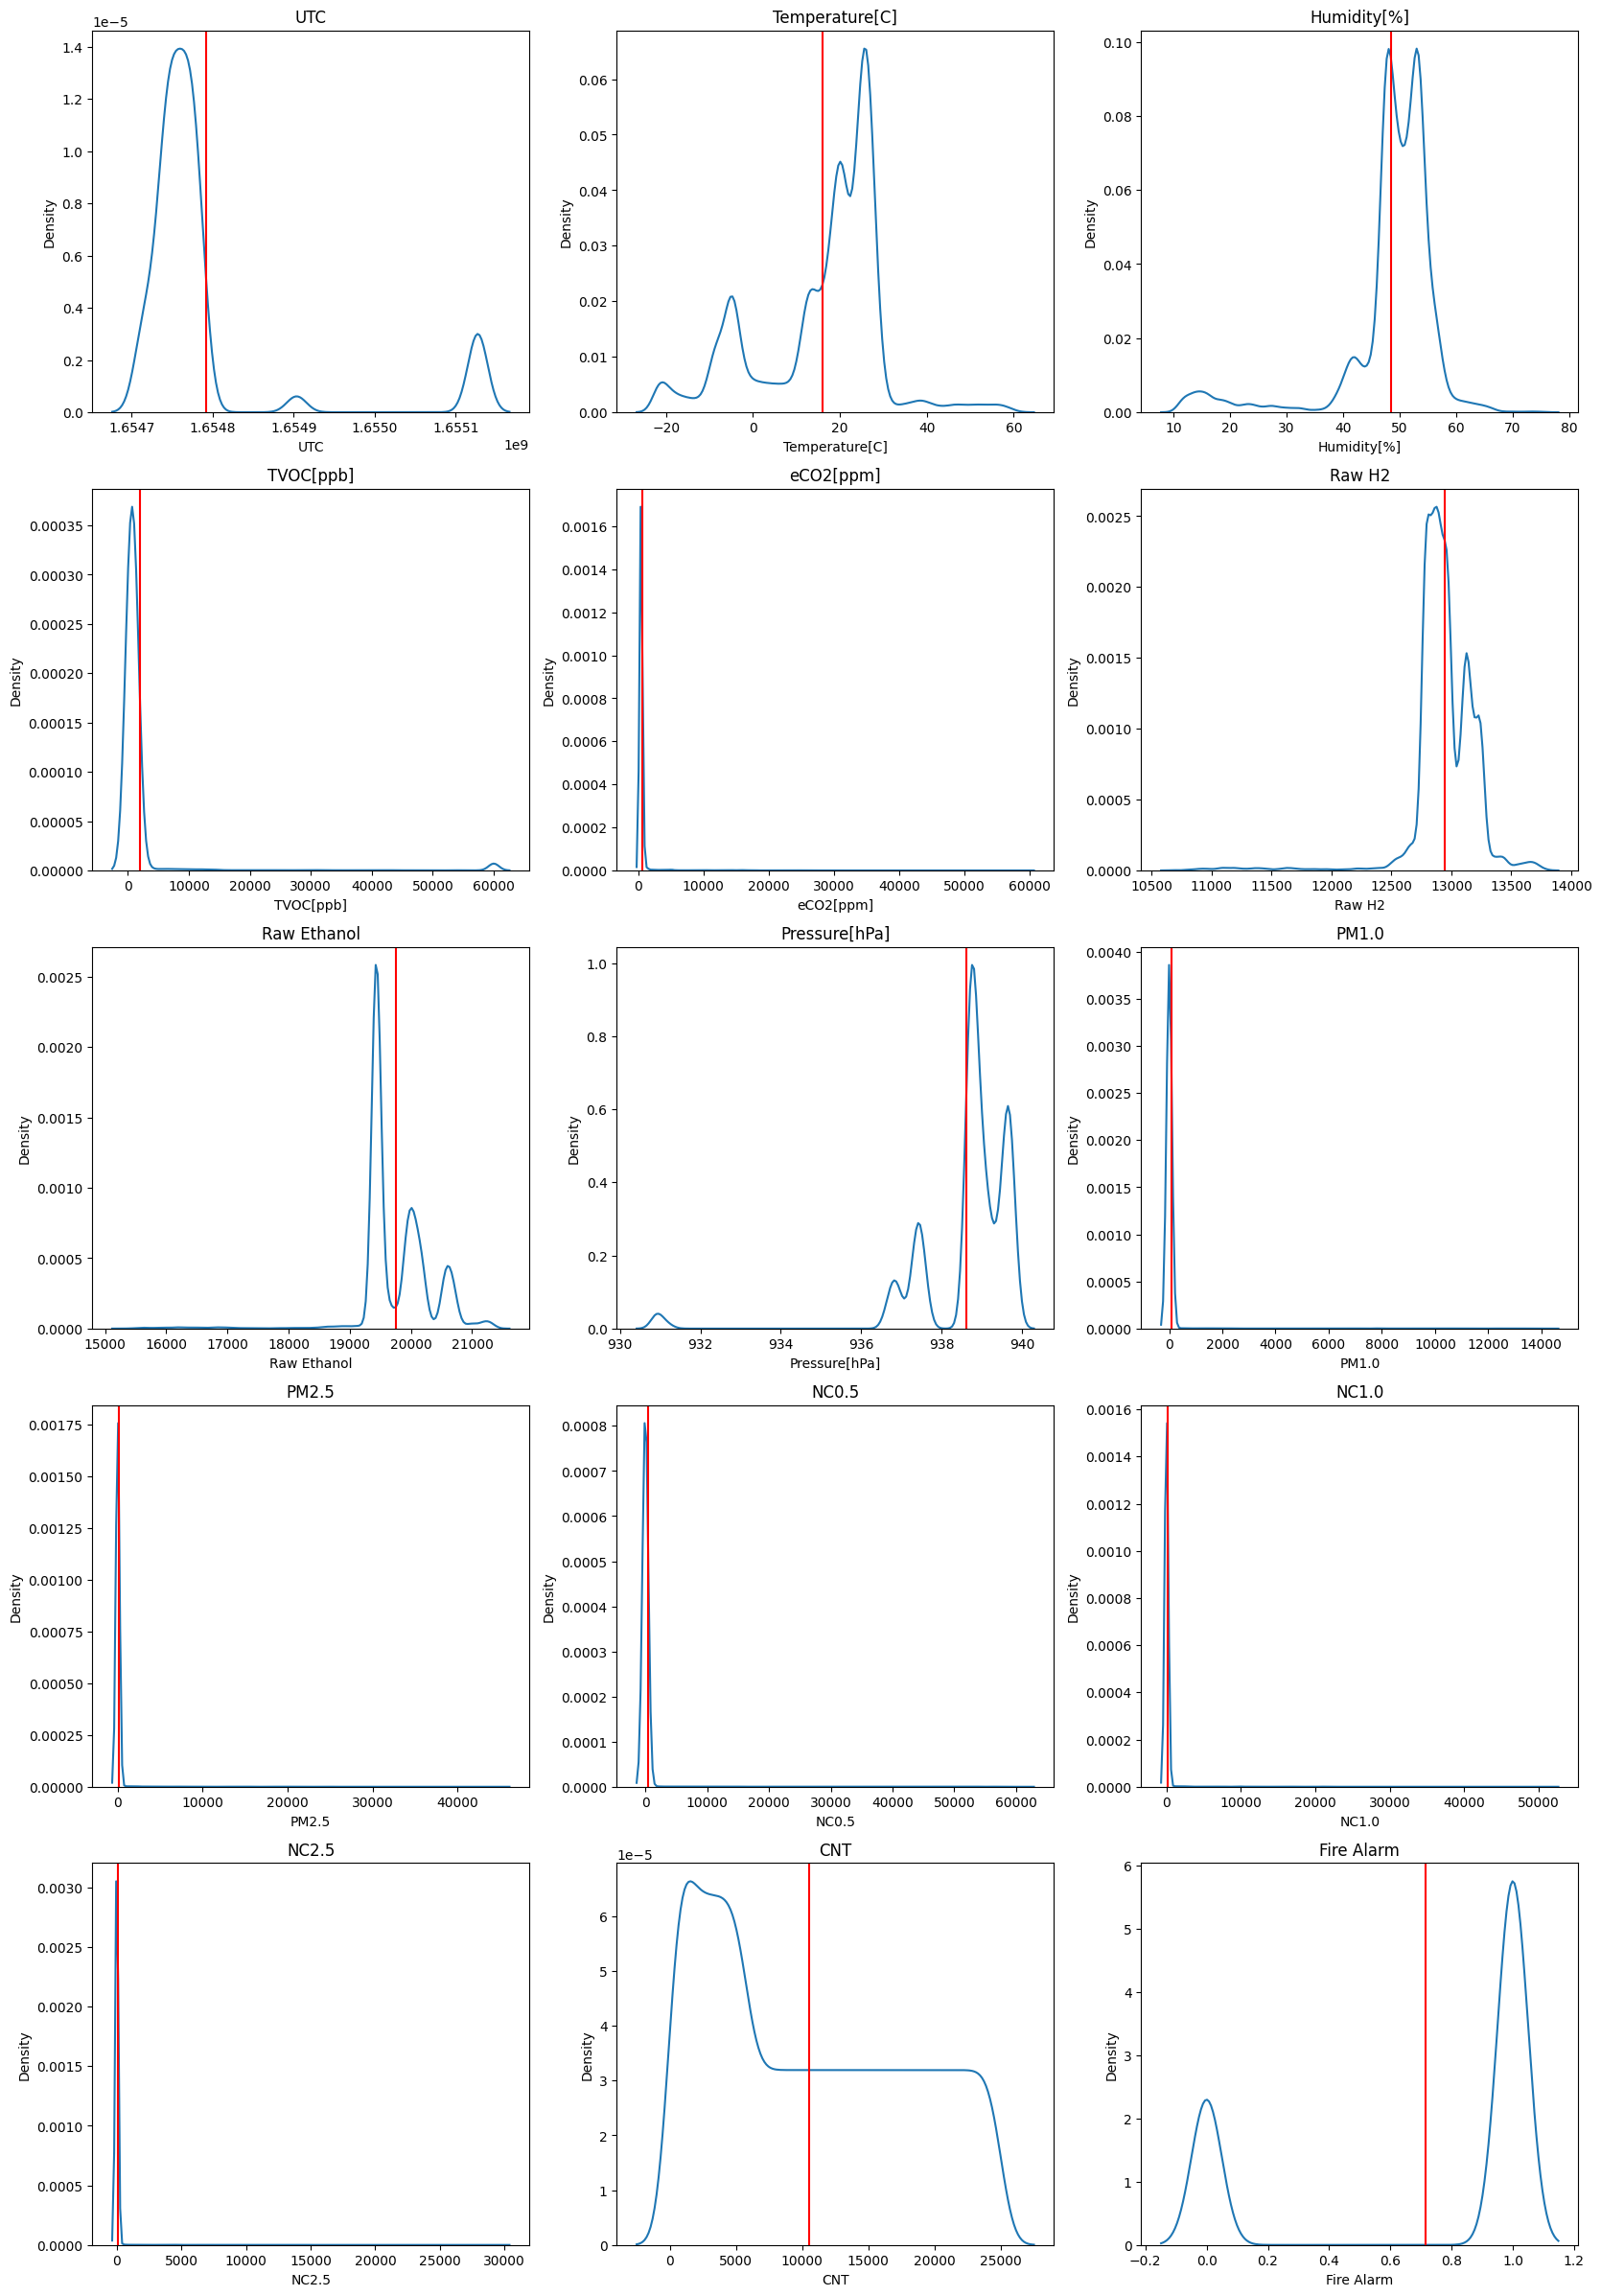

In [14]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20,30))
for j,i in enumerate(ori.columns):
    sns.kdeplot(ori[i], ax=ax[j//3,j%3])
    ax[j//3, j%3].axvline(ori[i].mean(), 0, 1, color = 'r')
    ax[j//3, j%3].set_title(i)
plt.show()


### Multivariate Analysis

/tmp/ipykernel_1883/4101296022.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=ori, x=i, ax=ax[j//3,j%3], hue=target)


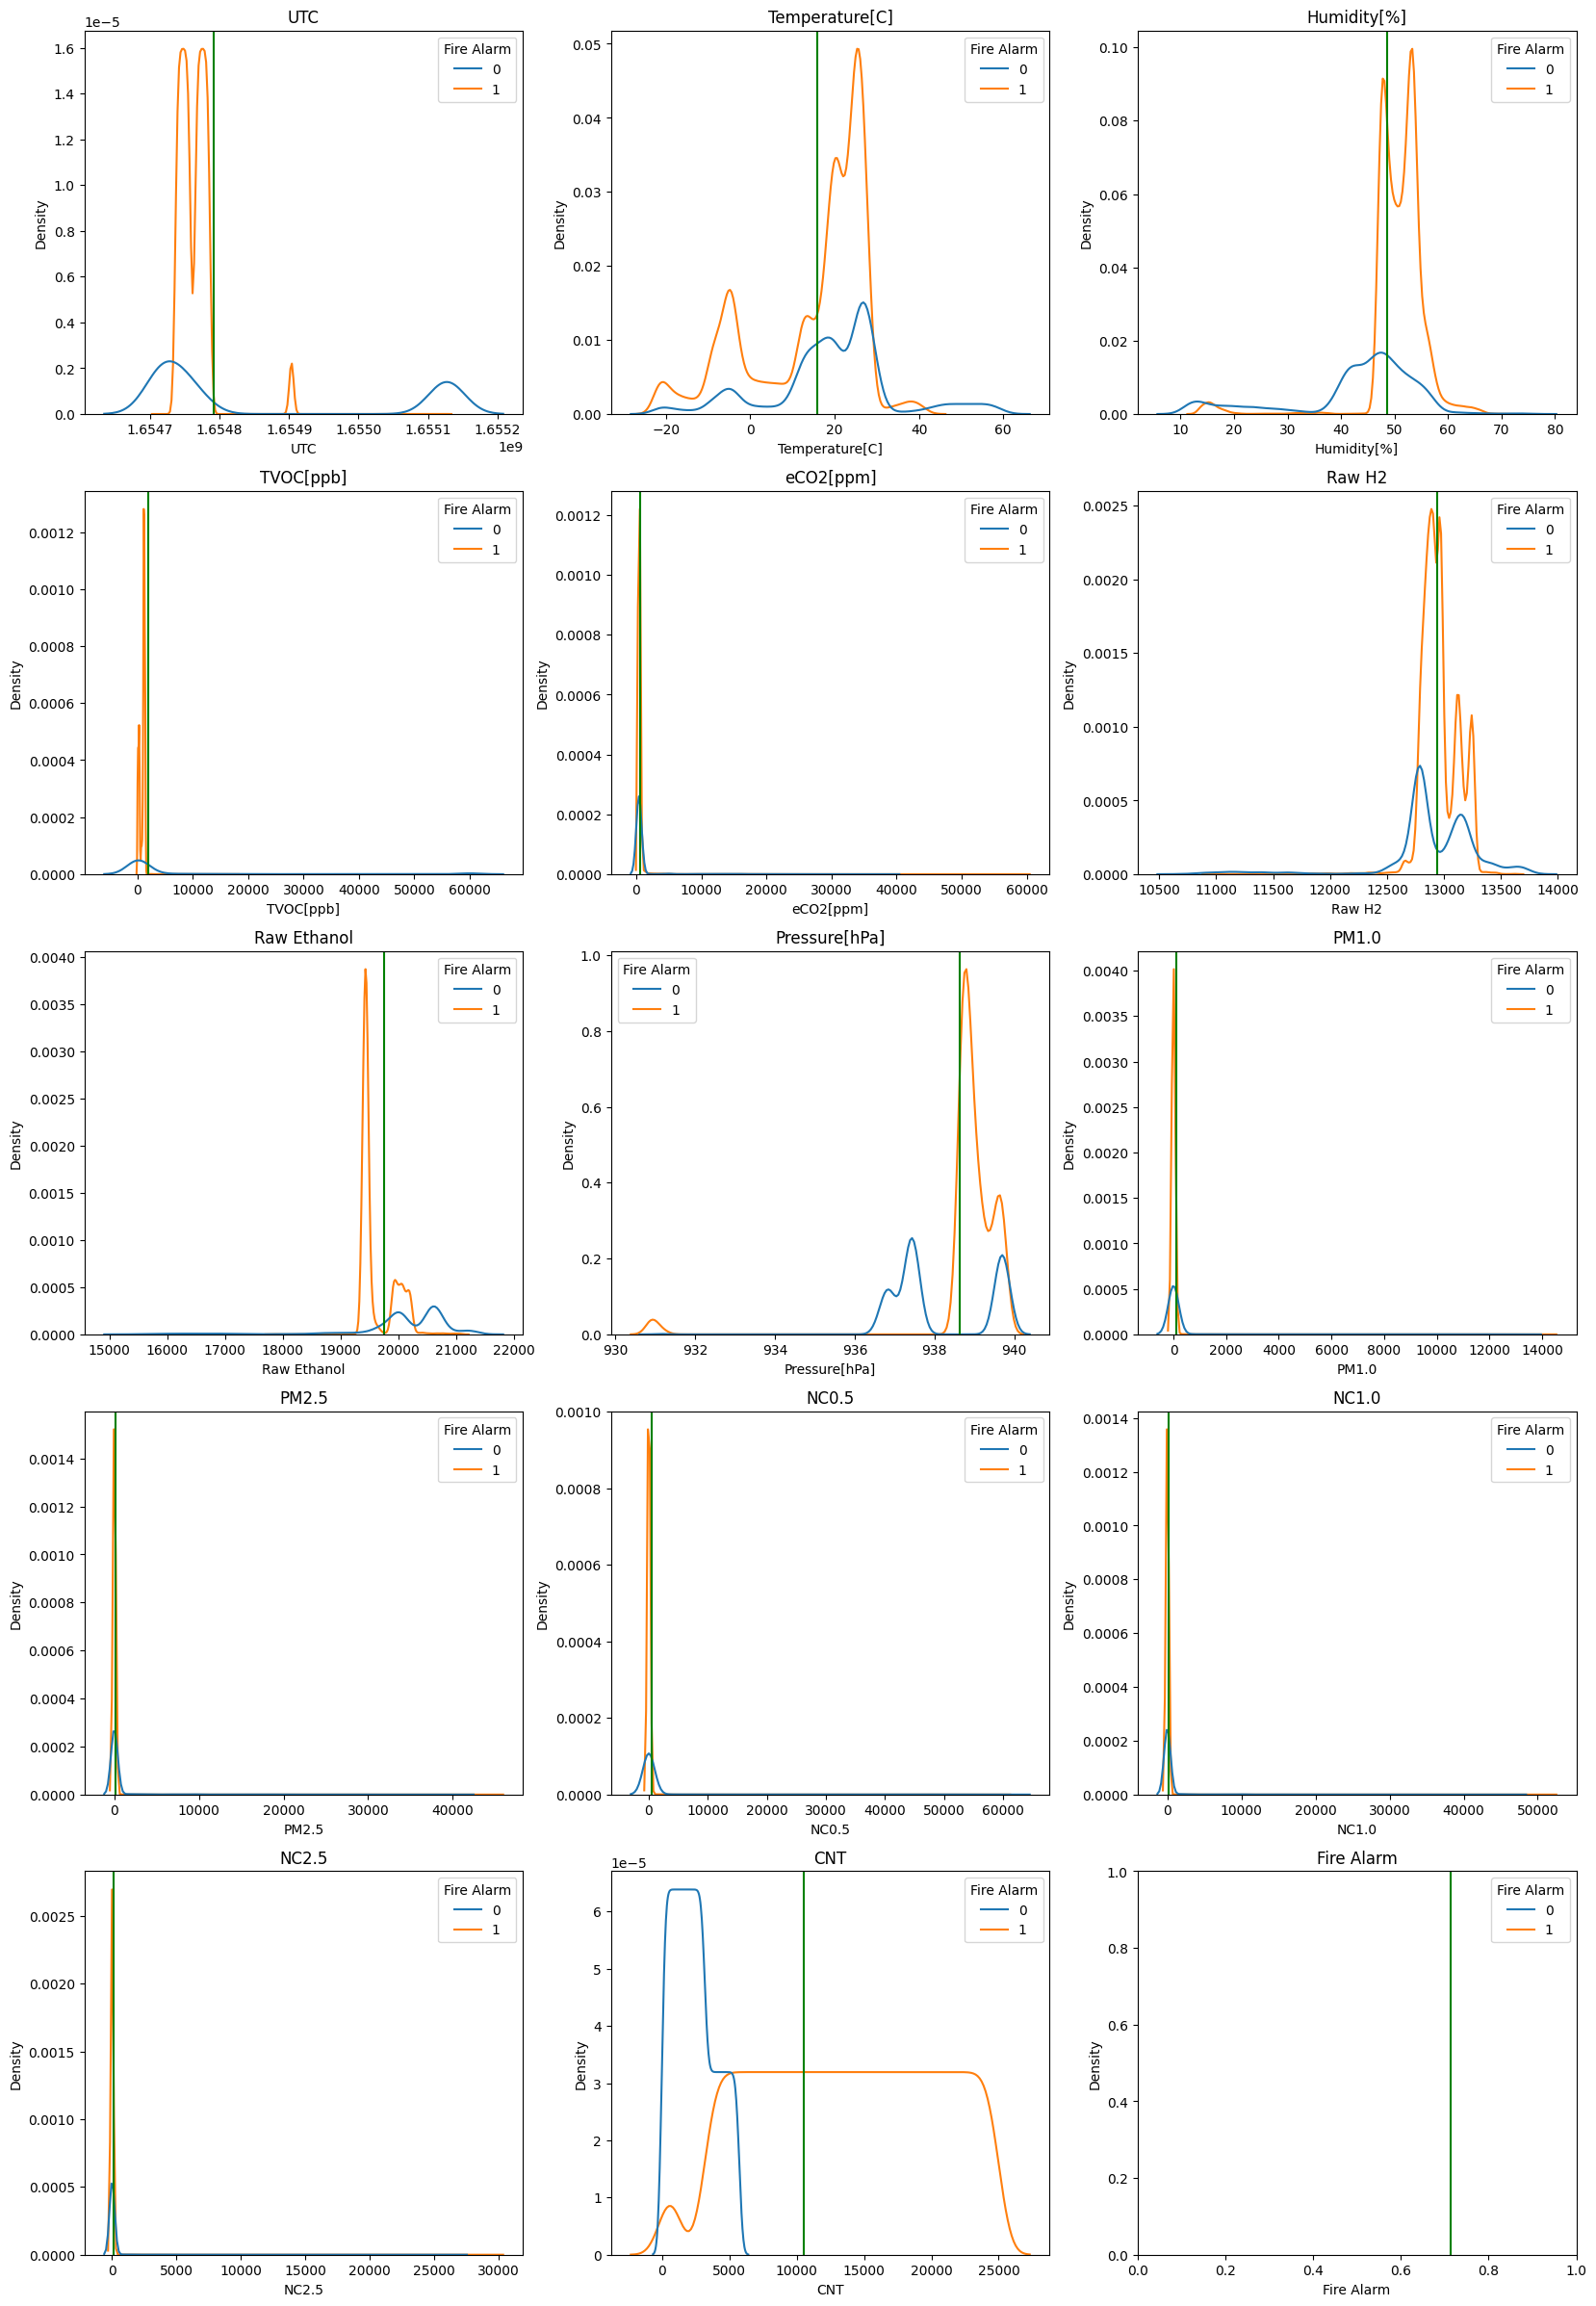

In [15]:
target = 'Fire Alarm'

fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20,30))
for j,i in enumerate(ori.columns):
    sns.kdeplot(data=ori, x=i, ax=ax[j//3,j%3], hue=target)
    ax[j//3, j%3].axvline(ori[i].mean(), 0, 1, color = 'g')
    ax[j//3, j%3].set_title(i)
plt.show()



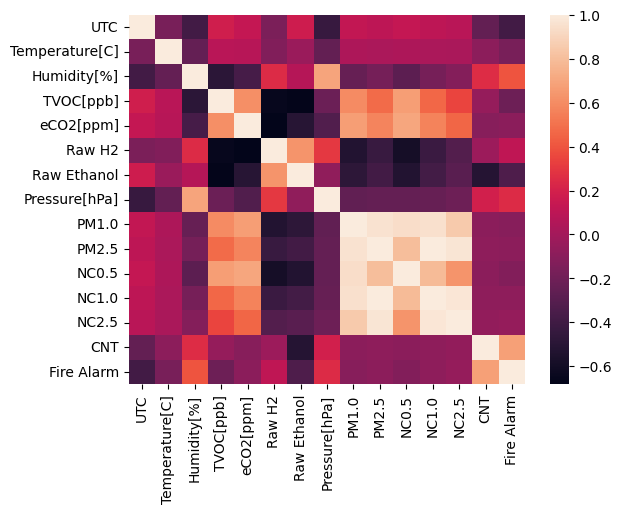

In [16]:
sns.heatmap(ori.corr(numeric_only = True))
plt.show()

### T-Test

In [35]:
dataset.columns

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [39]:
# perform t-test untuk 2 variabel
scs.ttest_ind(
    dataset_fire[dataset_fire['Temperature[C]'].isnull() != True]['Temperature[C]'],
    dataset_no_fire[dataset_no_fire['Temperature[C]'].isnull() != True]['Temperature[C]']
)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [38]:
# nilai t critical untuk alpha 0.05
scs.t.ppf(0.05, df = (len(dataset) - 2))

-1.6448883859912313

In [ ]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk pm10 statistically significant

### Check Imbalance Data

In [40]:
dataset['Fire Alarm'].value_counts()

1    31330
0    12511
Name: Fire Alarm, dtype: int64

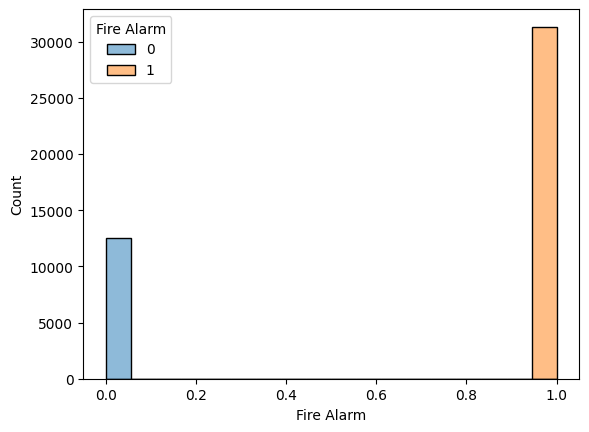

In [41]:
sns.histplot(data = dataset, x = 'Fire Alarm', hue = 'Fire Alarm')
plt.show()

### Check Outlier

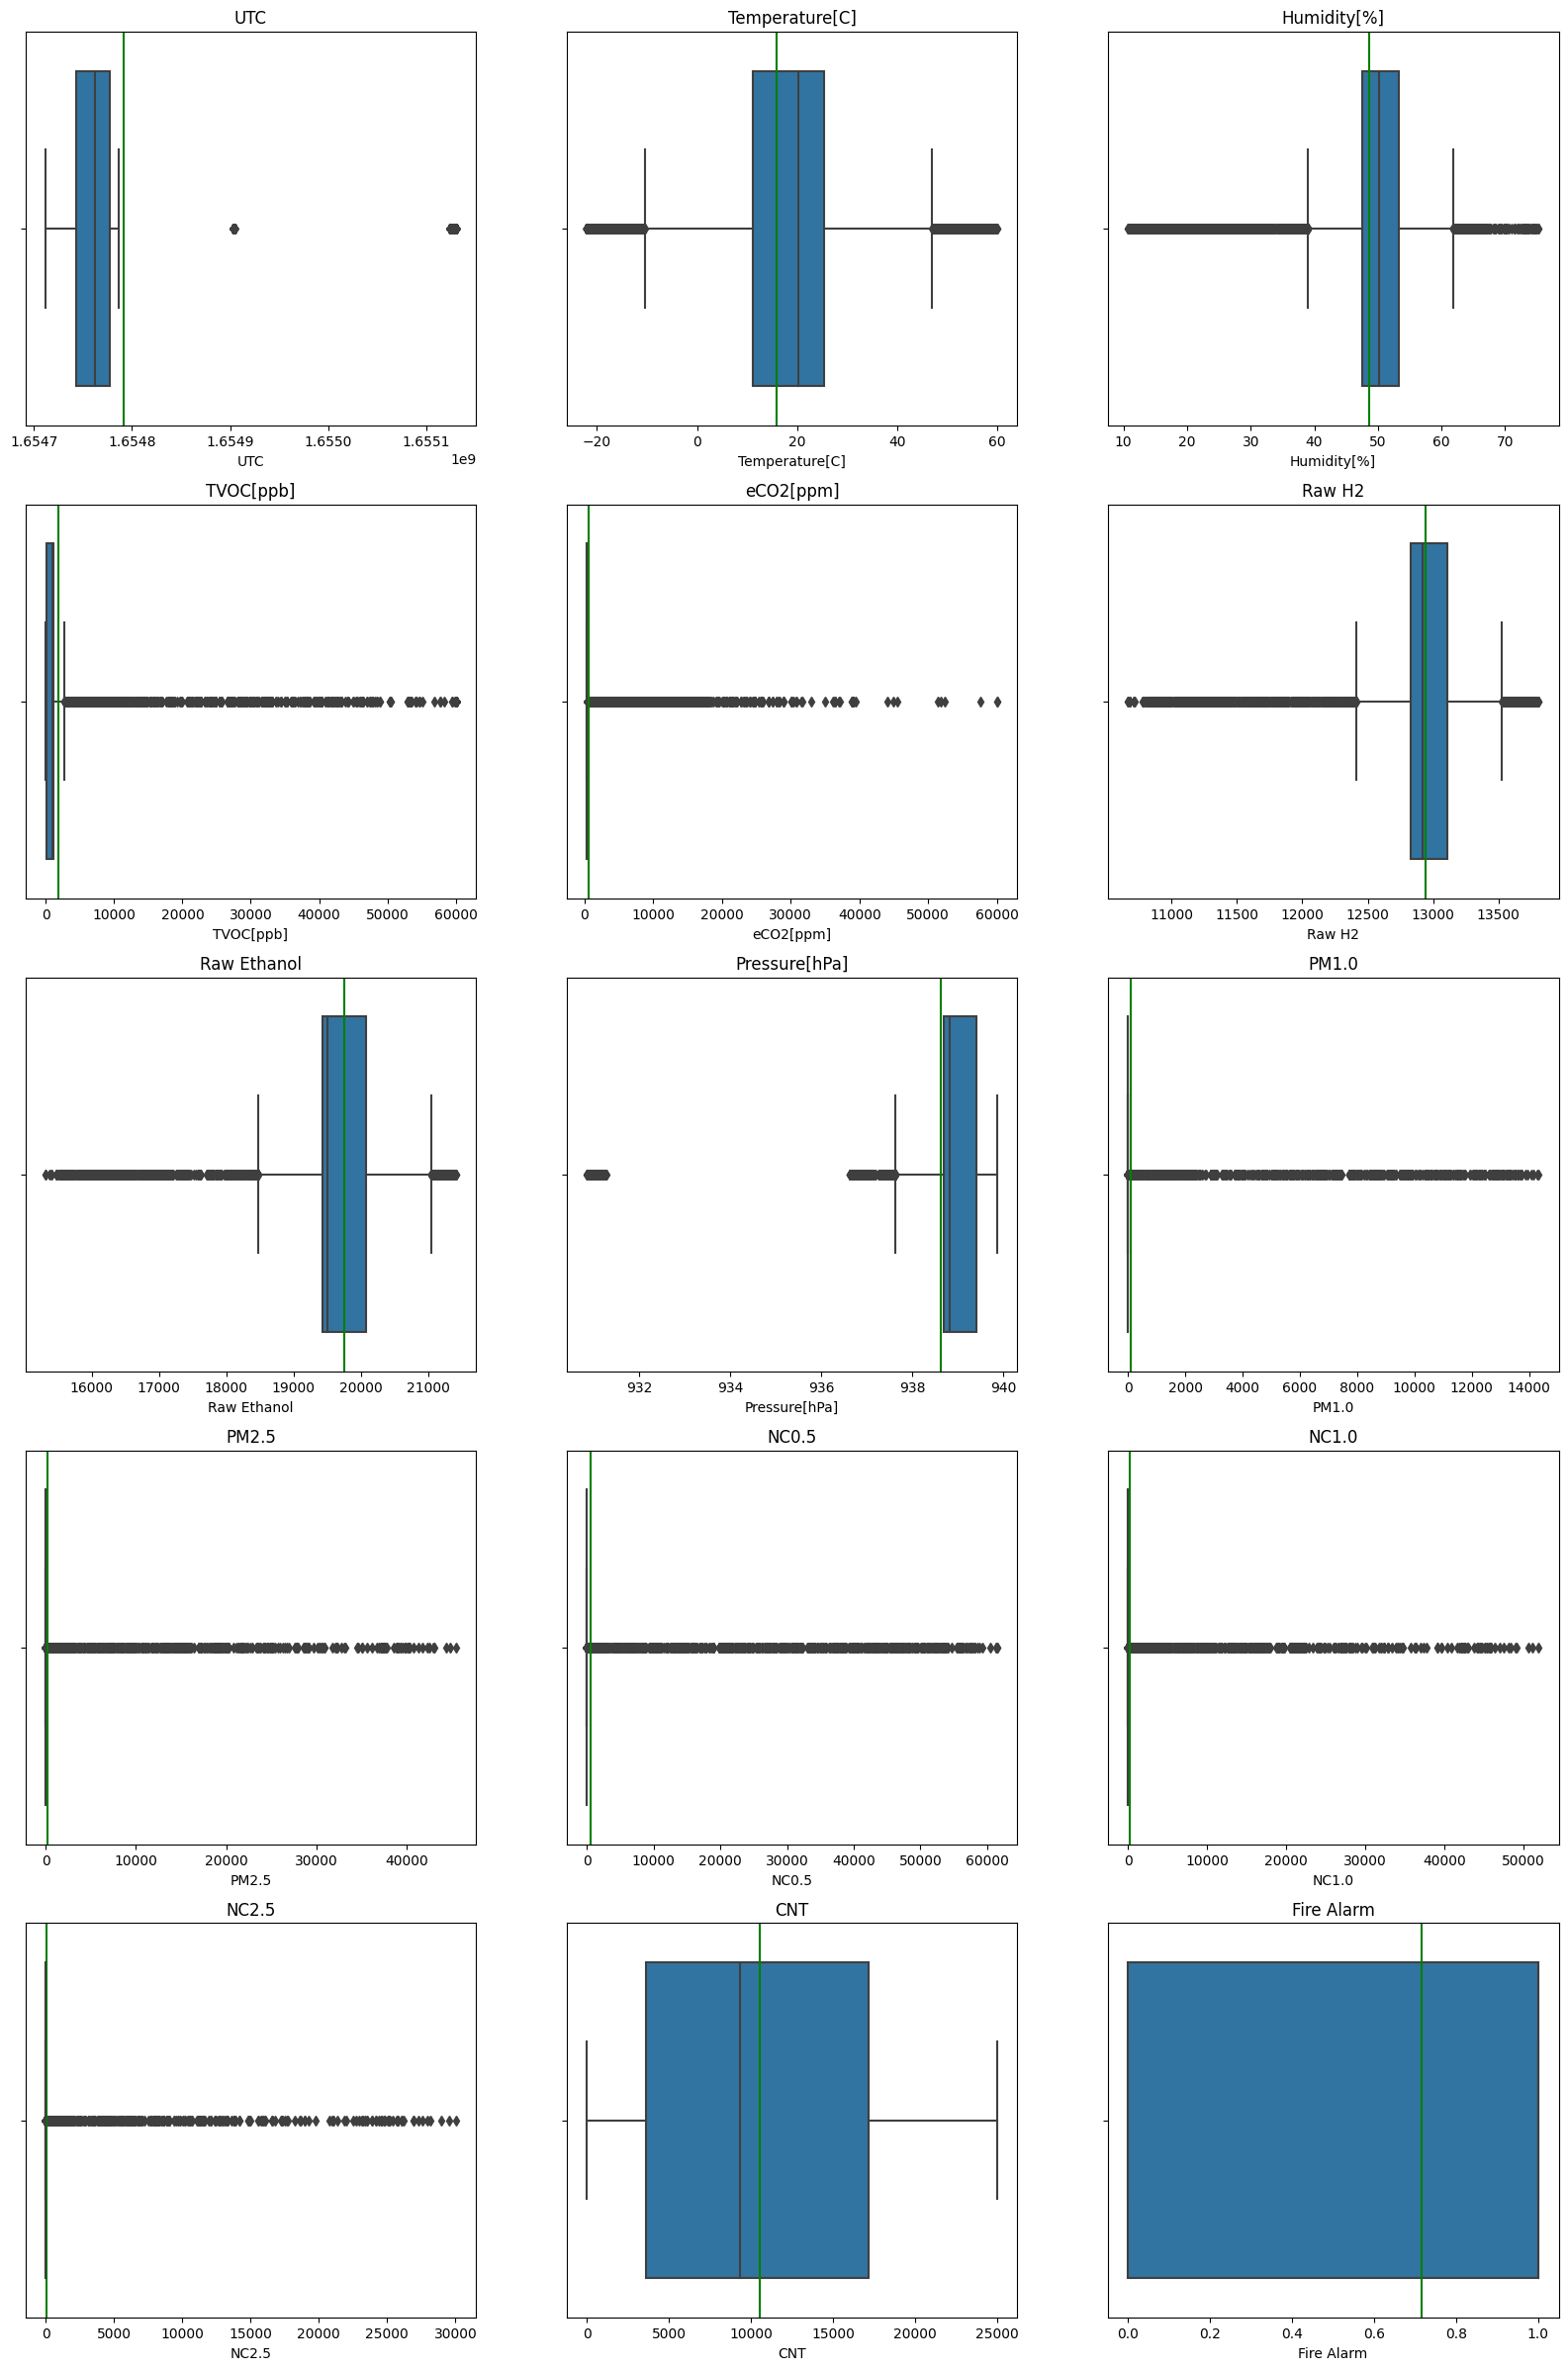

In [43]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20,30))
for j,i in enumerate(dataset.columns):
    sns.boxplot(data=dataset, x=i, ax=ax[j//3,j%3], hue=target)
    ax[j//3, j%3].axvline(dataset[i].mean(), 0, 1, color = 'g')
    ax[j//3, j%3].set_title(i)
plt.show()